<a href="https://colab.research.google.com/github/AbdullahFaiza/jupyter-exploration/blob/main/MT_FaizaAbdullah_ITAI_1378.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision Midterm Assignment
## Introduction
Welcome to your Computer Vision midterm project! Here, you'll get hands-on experience building an image recognition model using Convolutional Neural Networks and transfer learning.


##Install Necessary Libraries:

In [2]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Use tf.keras.preprocessing.image instead of keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2  # Choose a pre-trained model
from tensorflow.keras.callbacks import ModelCheckpoint

# Additional libraries for data loading (if using a custom dataset)
# from skimage.io import imread  # Example for loading images


**Dataset Selection and Loading**

* **Choose Your Dataset**
   * **Standard Datasets:** CIFAR-10, CIFAR-100, or a suitable subset of ImageNet are good starting points. You can use built-in functions to load them.
   * **Custom Dataset:** If you propose a custom dataset, ensure it has sufficient images per class, good quality, and accurate labeling. You'll need to upload it to Colab.
   * **Select your dataset and uncomment the appropriate loading code.**
   * **If you are using a custom dataset, make sure you have uploaded it to Colab and adjust the file path.**

In [4]:
# select your dataset
from keras.datasets import cifar10 # Or cifar100, or a suitable ImageNet loader


# *** Dataset Loading - Uncomment the lines for your chosen dataset ***

# Option 1: CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Option 2: CIFAR-100
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Option 3: Custom Dataset
# x_train, y_train = load_custom_data('path/to/your/training/data')
# x_test, y_test = load_custom_data('path/to/your/testing/data')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**Markdown Cell: Exploratory Data Analysis (EDA)**

* **Instructions:**
    * Visualize a few random images from your dataset to understand its content and overall quality.
    * Check the shape of your data to confirm the number of images and their dimensions.

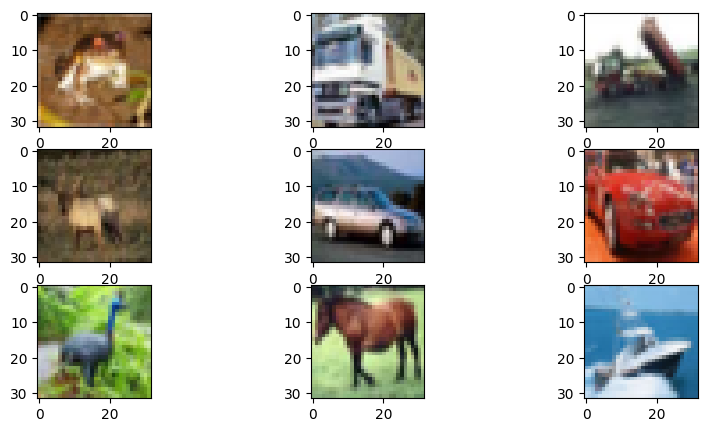

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Class Distribution (Top 10):
[(np.int64(0), 50000)]


In [5]:
# Insert codode here
# Insert code here to display a few sample images from the dataset
## Display sample images
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.show()
#
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

# Explore class distribution (if using a standard dataset)
from collections import Counter
print('Class Distribution (Top 10):')
print(Counter(np.argmax(y_train, axis=1)).most_common(10))

**Image Preprocessing**

* **Instructions:**
    1. **Normalization:**
       * Normalize pixel values (usually to the range of 0-1 or -1 to 1)  
    2. **Resizing:**
       * Resize images to a consistent size for model input.

In [6]:
# Insert code here to normalize images
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize images if needed (adjust input_shape in model building accordingly)
# x_train = tf.image.resize(x_train, (224, 224))  # Example for resizing to 224x224
# x_test = tf.image.resize(x_test, (224, 224))

# Insert code here to resize images, if needed

# ** Data Augmentation **

* **Instructions:**

1. Experiment with Parameters:  The code below has some example data augmentation parameters. Try changing the values within these parameters, or even adding new augmentation techniques! Here's a short guide:

* Hint 1: Start with small adjustments to see the effects clearly.
* Hint 2: Consider which augmentations make sense for your dataset. Flipping images of letters might be okay, but rotating them too much could make them unreadable!

* Explore more: Try adding things like shear_range (for shearing transformations) or zoom_range (for random zooming).

2. Visualize the Effects: After setting up your ImageDataGenerator, add a few lines of code to display some randomly augmented images from your dataset. This will help you see how your chosen parameters change the images.
* Hint: Use a small sample of images so it's easy to compare the originals with the augmented versions.

In [7]:
datagen = ImageDataGenerator(
       rotation_range=20,
       width_shift_range=0.1,
       height_shift_range=0.1,
       horizontal_flip=True,
       # Add more augmentations if desired
)
datagen.fit(x_train) # Fit the augmentation parameters to the training data


#Model Building (Transfer Learning)

In [8]:
# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze some layers of the pre-trained model (optional)
for layer in base_model.layers[:10]:
   layer.trainable = False  # Adjust the number of layers to freeze as needed

# Add custom top layers
x = base_model.output
x = Flatten()(x)
num_classes = 10  # Define num_classes here for CIFAR-10
predictions = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes for your dataset

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Model Training




In [9]:
import tensorflow as tf
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Convert y_train and y_test to categorical outside the fit function
history = model.fit(datagen.flow(x_train, y_train_categorical, batch_size=32), # Use pre-converted y_train_categorical
                    epochs=15,  # Adjust as needed
                    validation_data=(x_test, y_test_categorical), # Use pre-converted y_test_categorical
                    callbacks=[tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3570 - loss: 1.7071

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.3572 - loss: 1.7067 - val_accuracy: 0.6613 - val_loss: 0.9830
Epoch 2/15
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6194 - loss: 1.0924

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 37ms/step - accuracy: 0.6194 - loss: 1.0924 - val_accuracy: 0.7191 - val_loss: 0.8195
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6665 - loss: 0.9635

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6665 - loss: 0.9635 - val_accuracy: 0.7200 - val_loss: 0.8174
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6958 - loss: 0.8930

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6958 - loss: 0.8930 - val_accuracy: 0.7377 - val_loss: 0.8173
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7072 - loss: 0.8587

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7072 - loss: 0.8587 - val_accuracy: 0.7546 - val_loss: 0.7294
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7191 - loss: 0.8301 - val_accuracy: 0.7447 - val_loss: 0.7765
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7242 - loss: 0.8115 - val_accuracy: 0.7481 - val_loss: 0.7732
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7332 - loss: 0.7898 - val_accuracy: 0.7533 - val_loss: 0.7563
Epoch 9/15
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7386 - loss: 0.7661

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7386 - loss: 0.7662 - val_accuracy: 0.7609 - val_loss: 0.7113
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7427 - loss: 0.7605 - val_accuracy: 0.7627 - val_loss: 0.7343
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7460 - loss: 0.7487 - val_accuracy: 0.7595 - val_loss: 0.7121
Epoch 12/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7500 - loss: 0.7375 - val_accuracy: 0.7515 - val_loss: 0.7652
Epoch 13/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7593 - loss: 0.7145

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7593 - loss: 0.7145 - val_accuracy: 0.7709 - val_loss: 0.6839
Epoch 14/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7615 - loss: 0.7020

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7615 - loss: 0.7020 - val_accuracy: 0.7773 - val_loss: 0.6666
Epoch 15/15
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7661 - loss: 0.6928

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7661 - loss: 0.6928 - val_accuracy: 0.7828 - val_loss: 0.6599


#Enhanced Training

Implement data augmentation within the training loop.
Add callbacks to monitor progress and save the best performing model.
Modify the Training Code: If you haven't already, we need to make a few changes to your training loop:

1.   Integrate the Data Augmentation: Replace the
direct use of x_train with datagen.flow(x_train, y_train, batch_size=32). This will apply your augmentations in real-time during training
2.   Use the Validation Set: We already have validation_data=(x_test, y_test).
3. Save the Best Model: We're using a ModelCheckpoint callback to automatically save the model if its performance on the validation set improves
* Hint: Experiment with different batch sizes as well.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint # Import from tensorflow.keras
import tensorflow as tf # Import tensorflow


# Data Augmentation with ImageDataGenerator
datagen = ImageDataGenerator(
       rotation_range=20,
       width_shift_range=0.1,
       height_shift_range=0.1,
       horizontal_flip=True)

#  Modify the model fitting to use real-time augmentation
history = model.fit(datagen.flow(x_train, tf.keras.utils.to_categorical(y_train, num_classes=10), batch_size=32), # Convert y_train to categorical within datagen.flow
                    epochs=15,
                    validation_data=(x_test, tf.keras.utils.to_categorical(y_test, num_classes=10)),  # Convert y_test to categorical for validation data
                    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')])

Epoch 1/15
   1/1563 ━━━━━━━━━━━━━━━━━━━━ 2:02 78ms/step - accuracy: 0.6875 - loss: 1.0348

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7642 - loss: 0.6996

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7642 - loss: 0.6996 - val_accuracy: 0.7814 - val_loss: 0.6585
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7695 - loss: 0.6801 - val_accuracy: 0.7697 - val_loss: 0.6853
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7712 - loss: 0.6757

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7712 - loss: 0.6757 - val_accuracy: 0.7927 - val_loss: 0.6411
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7743 - loss: 0.6730 - val_accuracy: 0.7832 - val_loss: 0.6535
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7745 - loss: 0.6602 - val_accuracy: 0.7737 - val_loss: 0.6879
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7644 - loss: 0.6939 - val_accuracy: 0.7917 - val_loss: 0.6416
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7776 - loss: 0.6522 - val_accuracy: 0.7867 - val_loss: 0.6520
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7817 - loss: 0.6470 - val_accuracy: 0.7610 - val_loss: 0.7350
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7496 - loss: 0.7603 - val_accuracy: 0.7816 - val_loss: 0.6637
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7788 - loss: 0.6

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7922 - loss: 0.6164 - val_accuracy: 0.8003 - val_loss: 0.6165
Epoch 12/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7872 - loss: 0.6324 - val_accuracy: 0.7744 - val_loss: 0.7015
Epoch 13/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7889 - loss: 0.6206 - val_accuracy: 0.7886 - val_loss: 0.6742
Epoch 14/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7897 - loss: 0.6294 - val_accuracy: 0.7867 - val_loss: 0.6554
Epoch 15/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7850 - loss: 0.6252 - val_accuracy: 0.7922 - val_loss: 0.6365


#Visualizing Training Progress

Importance of Monitoring: Explain why tracking validation metrics helps identify overfitting or underfitting.

*   Plot training and validation accuracy/loss curves.


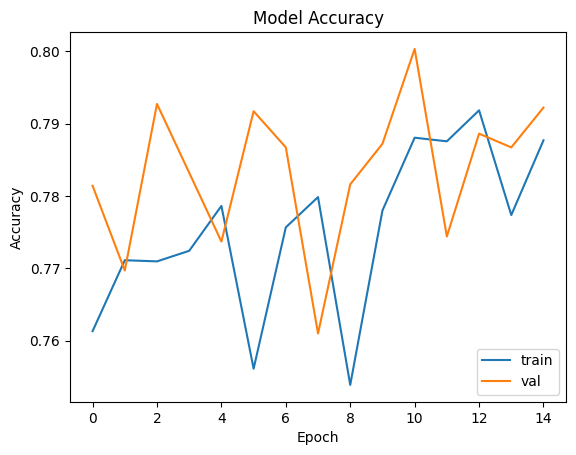

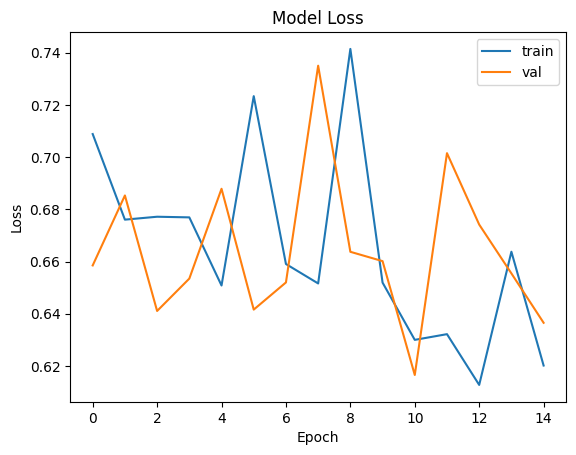

In [13]:
# Plot training and validation curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


#Evaluation on the Test Set

Discuss how test set metrics provide the most unbiased assessment of model performance.

In [17]:
from tensorflow.keras.models import load_model
import tensorflow as tf

best_model = load_model('best_model.h5')
# Convert y_test to categorical before evaluation
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)
test_loss, test_acc = best_model.evaluate(x_test, y_test_categorical)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8050 - loss: 0.6198
Test Loss: 0.6165255904197693
Test Accuracy: 0.8003000020980835


#Hyperparameter Tuning

>Exploring Learning Rates: In the provided code, we're iterating through different learning rates.
* Hint 1: A good starting range for the learning rate is often between 0.01 and 0.0001.
* Hint 2: Pay close attention to how quickly the validation loss starts to increase (if it does), which might signal a learning rate that's too high.



In [18]:
def create_model(learning_rate=0.01):
    # ... (Code to build your model, using the learning_rate parameter)
    return model

# Basic parameter exploration
for lr in [0.01, 0.001, 0.0001]:
    model = create_model(learning_rate=lr)
    # ... (Training the model)


#Confusion Matrx

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


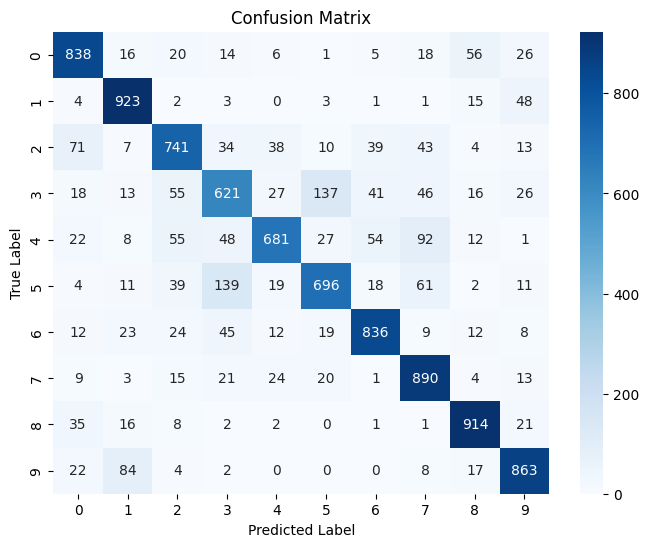

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#Discussion and Further Exploration

##Questions to consider:
1. How does the choice of pre-trained model (VGG16, ResNet50, etc.) affect the results?
2. Analyze the confusion matrix: Are errors more common between certain classes? What might explain this?
3. Experiment with different degrees of fine-tuning (freezing more/fewer layers of the pre-trained model).
4. If applicable to your dataset, can you collect more data for classes with higher error rates?
What are other ways to potentially improve accuracy? (e.g., ensembling models, exploring advanced augmentation strategies, class-weighted training)

Sources
towardsdatascience.com/build-your-own-deep-learning-classification-model-in-keras-511f647980d6
stackoverflow.com/questions/69997327/tensorflow-valueerror-input-0-is-incompatible-with-layer-model-expected-shape
www.influxdata.com/blog/time-series-forecasting-with-tensorflow-influxdb/